In [1]:
from zdm import survey
from zdm import cosmology as cos
from zdm import loading as loading
from zdm.misc_functions import *
import zdm.iteration as it
from zdm.MCMC import calc_log_posterior
from astropy.cosmology import Planck18
import scipy.stats as st
import zdm.energetics as en

plt.rcParams['font.size'] = 12
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["k", "tab:orange", "tab:blue", "tab:green", "tab:purple", "tab:brown", "tab:pink", "tab:gray"]) 

/fred/oz002/jhoffmann/FRB_library/zdm/.zdm_env/lib64/python3.9/site-packages/FRB-0.1.dev0-py3.9.egg/frb/halos/hmf.py:51: UserWarning: hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..
  warnings.warn("hmf_emulator not imported.  Hope you are not intending to use the hmf.py module..")


In [2]:
best_fits = []
labels = []

labels.append('Default') 
# BASE
best_fits.append({'sfr_n': 0.8808527057055584, 'alpha': 0.7895161131856694, 'lmean': 2.1198711983468064, 'lsigma': 0.44944780033763343, 'lEmax': 41.18671139482926, 'lEmin': 39.81049090314043, 'gamma': -1.1558450520609953, 'H0': 54.6887137195215})

# labels.append(r'No $P(N)$') 
# # BASE_nPn
# best_fits.append({'sfr_n': 0.8808527057055584, 'alpha': 0.7895161131856694, 'lmean': 2.075050719100272, 'lsigma': 0.40222616901185415, 'lEmax': 41.17952332700598, 'lEmin': 39.580394950607136, 'gamma': -1.055765846696212, 'H0': 51.59460417151428})

# labels.append('Power law luminosity') 
# # BASE_lf0_2
# best_fits.append({'luminosity_function': 0, 'sfr_n': 0.8778484759181941, 'alpha': 0.8651834188953196, 'lmean': 2.1268748683068246, 'lsigma': 0.3544020735989375, 'lEmax': 41.955851229232934, 'lEmin': 39.80130821833704, 'gamma': -1.6765273303795012, 'H0': 54.85781191943868})

# labels.append(r'Spectral index $\alpha$') 
# # BASE_a0
# best_fits.append({'alpha_method': 0, 'sfr_n': 0.8272410635282986, 'alpha': 0.6211735019300136, 'lmean': 2.005995812493475, 'lsigma': 0.4063898336832561, 'lEmax': 41.204693066954945, 'lEmin': 39.794705592292544, 'gamma': -1.25, 'H0': 49.28436512805642})

# labels.append(r'Source evolution') 
# # BASE_se1
# best_fits.append({'source_evolution': 1, 'sfr_n': 0.22600426164470444, 'alpha': 0.32624572355241066, 'lmean': 2.2004822865581257, 'lsigma': 0.35655443596997616, 'lEmax': 41.03952420192775, 'lEmin': 39.46394967814656, 'gamma': -0.6777402671591841, 'H0': 52.242767429628756})

# # labels.append(r'Source evolution 2') 
# # # BASE_se1
# # best_fits.append({'source_evolution': 1, 'sfr_n': 0.8808527057055584, 'alpha': 0.7895161131856694, 'lmean': 2.1198711983468064, 'lsigma': 0.44944780033763343, 'lEmax': 41.18671139482926, 'lEmin': 39.81049090314043, 'gamma': -1.1558450520609953, 'H0': 54.6887137195215})


In [3]:
s_names = [
    # "FAST2",
    # "FAST2_old"
    # "DSA",
    "FAST",
    # "CRAFT_class_I_and_II", 
    # "private_CRAFT_ICS_892_14", 
    # "private_CRAFT_ICS_1300_14", 
    # "private_CRAFT_ICS_1632_14", 
    # "parkes_mb_class_I_and_II"
]

states = []
survey_list = []
grid_list = []

for best_fit in best_fits:
    state = parameters.State()
    state.set_astropy_cosmo(Planck18) 
    state.update_params(best_fit)
    # state.update_param('luminosity_function', 2)
    # state.update_param('alpha_method', 0)
    # state.update_param('sfr_n', 1.36)
    # state.update_param('alpha', 1.5)
    # state.update_param('lmean', 1.97)
    # state.update_param('lsigma', 0.92)
    # state.update_param('lEmax', 43.0)
    # state.update_param('lEmin', 30.0)
    # state.update_param('gamma', -0.63)
    # state.update_param('H0', 70.0)
    # state.update_param('DMhalo', 50.0)

    states.append(state)

    if len(s_names) != 0:
        surveys, grids = loading.surveys_and_grids(survey_names = s_names, init_state=state, repeaters=False, nz=500, ndm=1400)
    else:
        surveys = []
        grids = []

    survey_list.append(surveys)
    grid_list.append(grids)

Loading survey: FAST
Loading survey: FAST from FAST.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  9  FRBs starting from 0
Initialised surveys
Initializing igamma_spline for gamma=-1.1558450520609953
Initialised grids
Loading survey: FAST
Loading survey: FAST from FAST.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  9  FRBs starting from 0
Initialised surveys
Initializing igamma_spline for gamma=-1.055765846696212
Initialised grids
Loading survey: FAST
Loading survey: FAST from FAST.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  9  FRBs starting from 0
Initialised surveys
Initialised grids
Loading survey: FAST
Loading survey: FAST from FAST.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  9  FRBs starting from 0
Initialised surveys
Initializing igamma_spline for gamma=-1.25
Initialised grids
Loading survey: FAST
Loading survey: FAST from FAST.ecsv
Loaded FRB info
FRB survey sucessfully initialised with  9  FRBs starting from 0
In

In [4]:
for i in range(len(survey_list)):
    newC, llc = it.minimise_const_only(None, grid_list[i], survey_list[i])
    llsum = 0

    for j in range(len(survey_list[i])):
        s = survey_list[i][j]
        g = grid_list[i][j]

        g.state.FRBdemo.lC = newC

        llsum += it.get_log_likelihood(g,s,Pn=True, psnr=True)
    
        expected=it.CalculateIntegral(g.rates,s)
        expected *= 10**g.state.FRBdemo.lC
        observed=s.NORM_FRB

        print(s.name + " - expected, observed: " + str(expected) + ", " + str(observed))

    print(labels[i], llsum)

FAST - expected, observed: 9.000000000000002, 9
Default -34.65597794397924
FAST - expected, observed: 8.999999999999993, 9
No $P(N)$ -34.54941215293219
FAST - expected, observed: 8.999999999999986, 9
Power law luminosity -34.44503389067216
FAST - expected, observed: 9.00000000000002, 9
Spectral index $\alpha$ -34.70043478429763
FAST - expected, observed: 8.999999999999991, 9
Source evolution -35.566117946381496


P(z>1) for survey FAST Default 0.7744366629122885
P(z>2) for survey FAST Default 0.31292909272361275
P(z>3) for survey FAST Default 0.09318973208555495
P(dm>3700) for survey FAST Default 0.07856752805810989
P(dm>5000) for survey FAST Default 0.016181180483877323
P(z>1) for survey FAST No $P(N)$ 0.735056015054588
P(z>2) for survey FAST No $P(N)$ 0.26681509596587033
P(z>3) for survey FAST No $P(N)$ 0.071760643632474
P(dm>3700) for survey FAST No $P(N)$ 0.07701724267104357
P(dm>5000) for survey FAST No $P(N)$ 0.017404047400449086
P(z>1) for survey FAST Power law luminosity 0.758918344524461
P(z>2) for survey FAST Power law luminosity 0.29364220486250064
P(z>3) for survey FAST Power law luminosity 0.08416993702025127
P(dm>3700) for survey FAST Power law luminosity 0.07023630084292153
P(dm>5000) for survey FAST Power law luminosity 0.014460025145307111
P(z>1) for survey FAST Spectral index $\alpha$ 0.7509122463040734
P(z>2) for survey FAST Spectral index $\alpha$ 0.2554065692018615
P(z>3) f

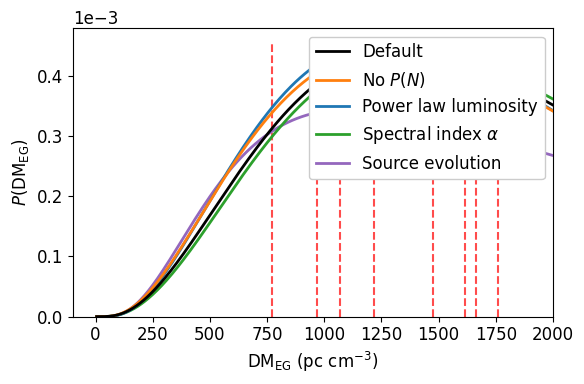

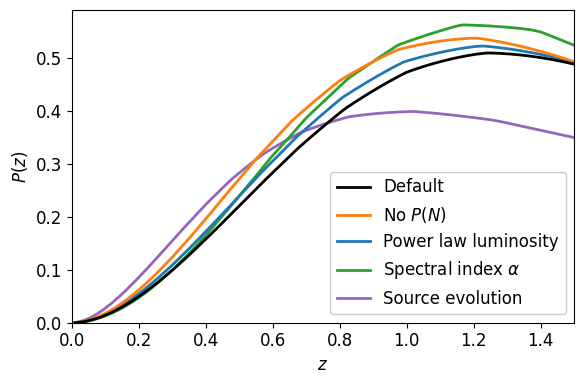

In [5]:
zlims = [1,2,3]
dmlims = [3700, 5000]

llsum = np.zeros(len(survey_list))

# fig0 = plt.figure(figsize=[8,6])
# ax0 = fig0.add_subplot()

# fig1 = plt.figure(figsize=[8,6])
# ax1 = fig1.add_subplot()

for i in range(len(survey_list[0])):
    # fig, axs = plt.subplots(1,2, figsize=[12,4])
    # axs[0].set_title(survey_list[0][i].name)
    # axs[1].set_title(survey_list[0][i].name)

    fig0 = plt.figure(figsize=[6,4])
    ax0 = fig0.add_subplot()

    fig1 = plt.figure(figsize=[6,4])
    ax1 = fig1.add_subplot()
    pzmax = 0
    pdmmax = 0

    for j in range(len(survey_list)):
        s = survey_list[j][i]
        g = grid_list[j][i]

        # Calc pdm,pz
        rates=g.rates

        dmvals=g.dmvals
        ddm = dmvals[1] - dmvals[0]
        pdm=np.sum(rates,axis=0)

        zvals=g.zvals
        dz = zvals[1] - zvals[0]
        pz=np.sum(rates,axis=1)

        pdm = pdm/np.sum(pdm)/ddm
        pz = pz/np.sum(pz)/dz

        if np.max(pdm) > pdmmax:
            pdmmax = np.max(pdm)
        if np.max(pz) > pzmax:
            pzmax = np.max(pz)

        for zlim in zlims:
            print("P(z>" + str(zlim) + ") for survey", s.name, labels[j], np.sum(pz[zvals>zlim])*dz)

        for dmlim in dmlims:
            print("P(dm>" + str(dmlim) + ") for survey", s.name, labels[j], np.sum(pdm[dmvals>dmlim])*ddm)
        
        pobs = it.get_log_likelihood(g,s,Pn=False, psnr=False)
        pobs2 = it.get_log_likelihood(g,s,Pn=False, psnr=True)
        # print(s.name, labels[j], pobs, pobs2-pobs)
        llsum[j] += pobs2 - pobs

        # Plot
        ax0.set_xlabel(r"DM$_{\mathrm{EG}}$ (pc cm$^{-3}$)")
        ax0.set_ylabel(r"$P$(DM$_{\mathrm{EG}}$)")
        ax0.plot(dmvals, pdm, label=labels[j], zorder=100-j, linewidth=2.0)
        # ax0.plot(dmvals, pdm, label=survey_list[j][i].name, zorder=10)

        ax1.set_xlabel(r"$z$")
        ax1.set_ylabel(r"$P(z)$")
        ax1.plot(zvals, pz, label=labels[j], zorder=100-j, linewidth=2.0)
        # ax1.plot(zvals, pz, label=survey_list[j][i].name, zorder=10)

    ax0.vlines(s.DMEGs, np.zeros(len(s.DMs)), pdmmax*np.ones(len(s.DMs)), ls='--', colors='r', alpha=0.7)
    ax1.vlines(s.Zs, np.zeros(len(s.Zs)), pzmax*np.ones(len(s.Zs)), ls='--', colors='r', alpha=0.7)
    ax1.vlines(s.ignored_Zs, np.zeros(len(s.ignored_Zs)), pzmax*np.ones(len(s.ignored_Zs)), ls='--', colors='c', alpha=1.0)

    ax0.set_xlim(xmax=2000, xmin=-100)
    ax0.set_ylim(ymin=0.0)
    ax0.ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))

    ax1.set_xlim(xmax=1.5, xmin=0.0)
    ax1.set_ylim(ymin=0.0)

    l0 = ax0.legend(loc='upper right')
    l0.set_zorder(101)
    l0.get_frame().set_alpha(None)
    l1 = ax1.legend()
    l1.set_zorder(101)
    l1.get_frame().set_alpha(None)

    fig0.tight_layout()
    fig1.tight_layout()

    # fig0.savefig(s.name + "pdm.pdf")
    # fig1.savefig(s.name + "pz.pdf")

# print(labels)
# print(llsum)

DSA
[ 0  1  3  4  5  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 4  5  8 10 14 16 17 20]
[0.248123 0.477958 0.622    0.30039  0.241397 0.1139   0.158239 0.284669] [329.30969458 367.19733205 537.77703305 263.80315688 522.57832111
 526.31772274 225.33425767 336.29764733]


/fred/oz002/jhoffmann/FRB_library/zdm/zdm/misc_functions.py:2730: RuntimeWarning: divide by zero encountered in log10
  zDMgrid = np.log10(zDMgrid)


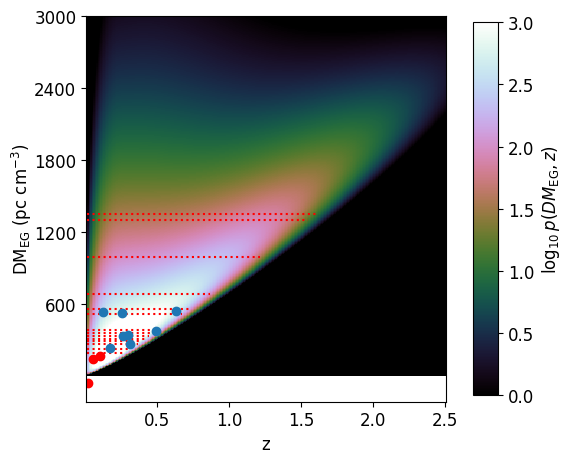

In [7]:
j = 0
print(survey_list[0][j].name)

for i in [0]: #range(len(grid_list)):
    
    g = grid_list[i][j]
    
    if survey_list[i][j].zlist is None:
        Zs = None
        DMs = None
    else:
        Zs = survey_list[i][j].Zs[survey_list[i][j].zlist]
        DMs = survey_list[i][j].DMEGs[survey_list[i][j].zlist]

    if survey_list[i][j].ignored_Zs is None:
        ignored_Zs = None
        ignored_DMs = None

        DMlines = survey_list[i][j].DMEGs[survey_list[i][j].nozlist]
    else:
        ignored_Zs = survey_list[i][j].ignored_Zs
        ignored_DMs = survey_list[i][j].DMEGs[survey_list[i][j].ignored_Zlist]

        line_list = [k for k in survey_list[i][j].nozlist if k not in survey_list[i][j].ignored_Zlist]
        DMlines = survey_list[i][j].DMEGs[line_list]

        print(survey_list[i][j].nozlist)
        print(survey_list[i][j].ignored_Zlist)

    # print(Zs, DMs)
    print(ignored_Zs, ignored_DMs)
    # print(DMlines)

    plot_grid_2(
            zDMgrid=g.rates,
            zvals=g.zvals,
            dmvals=g.dmvals,
            zmax=2.5,
            DMmax=3000,
            norm=0,
            log=True,
            project=False,
            conts=False,
            showplot=True,
            save=False,
            name=survey_list[0][j].name + "pzdm.pdf",
            DMlines=DMlines,
            FRBZ=Zs,
            FRBDM=DMs,
            FRBZ2=ignored_Zs,
            FRBDM2=ignored_DMs,
            data_clr='r',
            data_clr2='tab:blue'
            # ylabel=r"DM$_{\mathrm{EG}}$ (pc cm$^{-3}$)"
        )

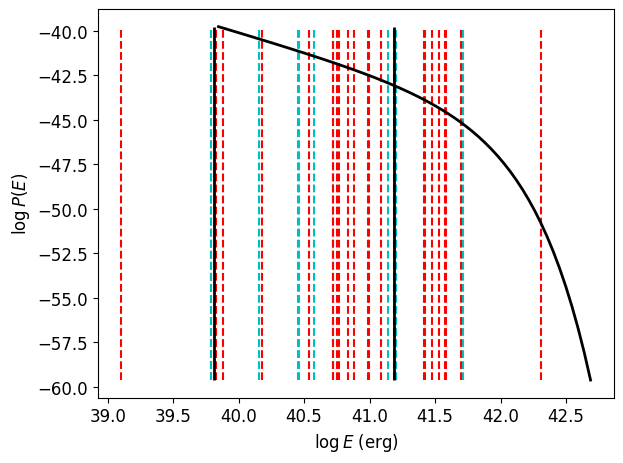

In [26]:
for j in range(len(survey_list)):
    
    fig = plt.figure()
    lEmax=best_fits[j]['lEmax']
    lEmin=best_fits[j]['lEmin']
    gamma=best_fits[j]['gamma']

    # lEmin=38
    lEvec = np.linspace(38, lEmax+1.5, 100)

    pE = en.vector_diff_gamma(10**lEvec, 10**lEmin, 10**lEmax, gamma)

    lEvec = lEvec[pE > 0]
    pE = pE[pE > 0]

    plt.xlabel(r'log$\,E$ (erg)')
    plt.ylabel(r'log$\,P(E)$')
    plt.vlines([best_fits[j]['lEmin']],[np.log10(np.min(pE))],[np.log10(np.max(pE))], linewidth=2.0, colors='k', zorder=40)
    plt.vlines([lEmax],[np.log10(np.min(pE))],[np.log10(np.max(pE))], linewidth=2.0, colors='k', zorder=40)
    plt.plot(lEvec, np.log10(pE), 'k', linewidth=2.0, zorder=50)

    for i in range(len(survey_list[0])):
        survey = survey_list[j][i]
        grid = grid_list[j][i]
        # print(survey.beam_b)
        # print(survey.beam_o)

        zlists = [survey.zlist, survey.ignored_Zlist]
        Zobss = [survey.Zs[survey.zlist], survey.ignored_Zs]
        colours = ['r','c']
        
        for i, zlist in enumerate(zlists):
            if zlist is not None:
                Zobs = Zobss[i]
                # Evaluate thresholds at the exact DMobs
                kdmobs=(survey.DMs - survey.DMhalo - survey.meta['DMG'])/ddm
                kdmobs=kdmobs[zlist]
                kdmobs[kdmobs<0] = 0
                idmobs1=kdmobs.astype('int')
                idmobs2=idmobs1+1
                dkdmobs=kdmobs-idmobs1 # applies to idms2

                # get indices in z space
                dz=zvals[1]-zvals[0]
                kzs=Zobs/dz
                izs1=kzs.astype('int')
                izs2=izs1+1
                dkzs=kzs-izs1 # applies to izs2

                # Linear interpolation
                Eths = grid.thresholds[:,izs1,idmobs1]*(1.-dkdmobs)*(1-dkzs)
                Eths += grid.thresholds[:,izs2,idmobs1]*(1.-dkdmobs)*dkzs
                Eths += grid.thresholds[:,izs1,idmobs2]*dkdmobs*(1-dkzs)
                Eths += grid.thresholds[:,izs2,idmobs2]*dkdmobs*dkzs

                # bEobs = np.zeros(Eths.shape)
                # for k,b in enumerate(survey.beam_b):
                #     bEths = Eths / b
                #     bEobs += bEths*survey.Ss[zlist]
                
                bav = np.sum(survey.beam_b * survey.beam_o) / np.sum(survey.beam_o)  #sum(b P(b))
                bEobs = Eths*survey.Ss[zlist] / bav
                bEobs = bEobs[0]

                plt.vlines(np.log10(bEobs), np.ones(len(bEobs)) * np.log10(np.min(pE)), np.ones(len(bEobs)) * np.log10(np.max(pE)), ls='--', colors=colours[i])

    plt.tight_layout()
    plt.savefig("pE.pdf")
        